In [66]:
import numpy as np
import pandas as pd
import sys
import sqlite3

import matplotlib
matplotlib.use
import matplotlib.pyplot as plt
plt.style.use('plotting.mplstyle')

In [2]:
sys.path.insert(0, '/home/nsryan/Desktop/arfc/transition-scenarios/scripts')
mycolors = ["#332288", "#117733", "#44AA99", "#88CCEE", "#DDCC77", "#CC6677", "#AA4499", "#882255"]

In [3]:
import cymetric as cym
from cymetric import graphs
import transition_metrics as tm
import dataframe_analysis as dta

In [4]:
import nuclides
import fuel_transactions as tran

# Scope
The scope of this notebook includes the historically deployed LWRs in the United States.

In [168]:
# current_outfile = '../output/existing_lwr_only_out.sqlite'
# current_outfile = 'test_tran_out6.sqlite'
# current_outfile = 'output/dan1_out.sqlite'
current_outfile = 'multi_fuel/output/dan1_out6.sqlite'

In [169]:
db = cym.dbopen(current_outfile)
evaler = cym.Evaluator(db, write=False)
# graphs.flow_graph(evaler, label='com')

## Reactor Deployment

In [69]:
current_lwr = ['Sinks', 'LWRfc', 'Sink_HLW', 'Sink_LLW', 'Mine', 'Enrichment']
sim_ap = ['United States', 'Sinks', 'APfc', 'Sink_HLW', 'Sink_LLW', 'Mine', 'Enrichment']
sim_xe = ['United States', 'Sinks', 'Xefc', 'Sink_HLW', 'Sink_LLW', 'Mine_xe_lp', 'Mine_xe_h', 'Enrichment_xe_leup', 'Enrichment_xe_haleu']
sim_mmr = ['United States', 'Sinks', 'MMRfc', 'Sink_HLW', 'Sink_LLW', 'Mine_mmr_lp', 'Mine_mmr_h', 'Enrichment_mmr_leup', 'Enrichment_mmr_haleu']

In [170]:
xes = ['XE']

In [7]:
lwr_list = [
    'Arkansas_Nuclear_One_1',
    'Arkansas_Nuclear_One_2',
    'Beaver_Valley_1',
    'Beaver_Valley_2',
    'Big_Rock_Point',
    'Braidwood_1',
    'Braidwood_2',
    'Browns_Ferry_1',
    'Browns_Ferry_2',
    'Browns_Ferry_3',
    'Brunswick_1',
    'Brunswick_2',
    'Byron_1',
    'Byron_2',
    'Callaway',
    'Calvert_Cliffs_1',
    'Calvert_Cliffs_2',
    'Catawba_1',
    'Catawba_2',
    'Clinton_1',
    'Columbia',
    'Comanche_Peak_1',
    'Comanche_Peak_2',
    'Cook_1',
    'Cook_2',
    'Cooper_Station',
    'Crystal_River_3',
    'Davis_Besse',
    'Diablo_Canyon_1',
    'Diablo_Canyon_2',
    'Dresden_1',
    'Dresden_2',
    'Dresden_3',
    'Duane_Arnold',
    'Enrico_Fermi_2',
    'Farley_1',
    'Farley_2',
    'Fitzpatrick',
    'Fort_Calhoun',
    'Ginna',
    'Grand_Gulf_1',
    'Haddam_Neck',
    'Harris_1',
    'Hatch_1',
    'Hatch_2',
    'Hope_Creek',
    'Humboldt_Bay',
    'Indian_Point_1',
    'Indian_Point_2',
    'Indian_Point_3',
    'Kewaunee',
    'La_Crosse',
    'LaSalle_County_1',
    'LaSalle_County_2',
    'Limerick_1',
    'Limerick_2',
    'Maine_Yankee',
    'McGuire_1',
    'McGuire_2',
    'Millstone_1',
    'Millstone_2',
    'Millstone_3',
    'Monticello',
    'Nine_Mile_Point_1',
    'Nine_Mile_Point_2',
    'North_Anna_1',
    'North_Anna_2',
    'Oconee_1',
    'Oconee_2',
    'Oconee_3',
    'Oyster_Creek',
    'Palisades',
    'Palo_Verde_1',
    'Palo_Verde_2',
    'Palo_Verde_3',
    'Peach_Bottom_2',
    'Peach_Bottom_3',
    'Perry_1',
    'Pilgrim_1',
    'Point_Beach_1',
    'Point_Beach_2',
    'Prairie_Island_1',
    'Prairie_Island_2',
    'Quad_Cities_1',
    'Quad_Cities_2',
    'Rancho_Seco',
    'River_Bend_1',
    'Robinson_2',
    'Salem_1',
    'Salem_2',
    'San_Onofre_1',
    'San_Onofre_2',
    'San_Onofre_3',
    'Seabrook',
    'Sequoyah_1',
    'Sequoyah_2',
    'Shoreham',
    'South_Texas_1',
    'South_Texas_2',
    'St_Lucie_1',
    'St_Lucie_2',
    'Summer_1',
    'Surry_1',
    'Surry_2',
    'Susquehanna_1',
    'Susquehanna_2',
    'Three_Mile_Island_1',
    'Three_Mile_Island_2',
    'Trojan',
    'Turkey_Point_3',
    'Turkey_Point_4',
    'Vermont_Yankee',
    'Vogtle_1',
    'Vogtle_2',
    'Vogtle_3',
    'Vogtle_4',
    'Waterford_3',
    'Watts_Bar_1',
    'Watts_Bar_2',
    'Wolf_Creek_1',
    'Yankee_Rowe',
    'Zion_1',
    'Zion_2',
]

In [171]:
current_reactors = tm.get_lwr_totals(current_outfile, xes)
current_reactors = dta.add_year(current_reactors, y0=1958)

In [172]:
current_reactors

Prototype,index,Time,0,Arkansas_Nuclear_One_1_enter,Arkansas_Nuclear_One_2_enter,Beaver_Valley_1_enter,Beaver_Valley_2_enter,Big_Rock_Point_enter,Braidwood_1_enter,Braidwood_2_enter,...,Watts_Bar_1_exit,Watts_Bar_2_exit,Wolf_Creek_1_exit,Yankee_Rowe_exit,Zion_1_exit,Zion_2_exit,XE_exit,lwr_exit,lwr_total,Year
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,1958.00
1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,1958.08
2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,1958.17
3,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,1958.25
4,4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,1958.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,1747,1747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1181.0,2103.58
1748,1748,1748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1181.0,2103.67
1749,1749,1749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1181.0,2103.75
1750,1750,1750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1181.0,2103.83


In [102]:
current_reactors.keys().tolist()

['index',
 'Time',
 0,
 'Arkansas_Nuclear_One_1_enter',
 'Arkansas_Nuclear_One_2_enter',
 'Beaver_Valley_1_enter',
 'Beaver_Valley_2_enter',
 'Big_Rock_Point_enter',
 'Braidwood_1_enter',
 'Braidwood_2_enter',
 'Browns_Ferry_1_enter',
 'Browns_Ferry_2_enter',
 'Browns_Ferry_3_enter',
 'Brunswick_1_enter',
 'Brunswick_2_enter',
 'Byron_1_enter',
 'Byron_2_enter',
 'Callaway_enter',
 'Calvert_Cliffs_1_enter',
 'Calvert_Cliffs_2_enter',
 'Catawba_1_enter',
 'Catawba_2_enter',
 'Clinton_1_enter',
 'Columbia_enter',
 'Comanche_Peak_1_enter',
 'Comanche_Peak_2_enter',
 'Cook_1_enter',
 'Cook_2_enter',
 'Cooper_Station_enter',
 'Crystal_River_3_enter',
 'Davis_Besse_enter',
 'Diablo_Canyon_1_enter',
 'Diablo_Canyon_2_enter',
 'Dresden_1_enter',
 'Dresden_2_enter',
 'Dresden_3_enter',
 'Duane_Arnold_enter',
 'Enrichment_leu',
 'Enrichment_xe_haleu',
 'Enrichment_xe_leup',
 'Enrico_Fermi_2_enter',
 'Farley_1_enter',
 'Farley_2_enter',
 'Fitzpatrick_enter',
 'Fort_Calhoun_enter',
 'FuelCycle',
 

In [10]:
total_lwr = np.zeros(len(current_reactors))
for reactor in lwr_list:
    for time in range(len(current_reactors)):
        total_lwr[time] += current_reactors[reactor + '_enter'][time]
        total_lwr[time] += current_reactors[reactor + '_exit'][time]

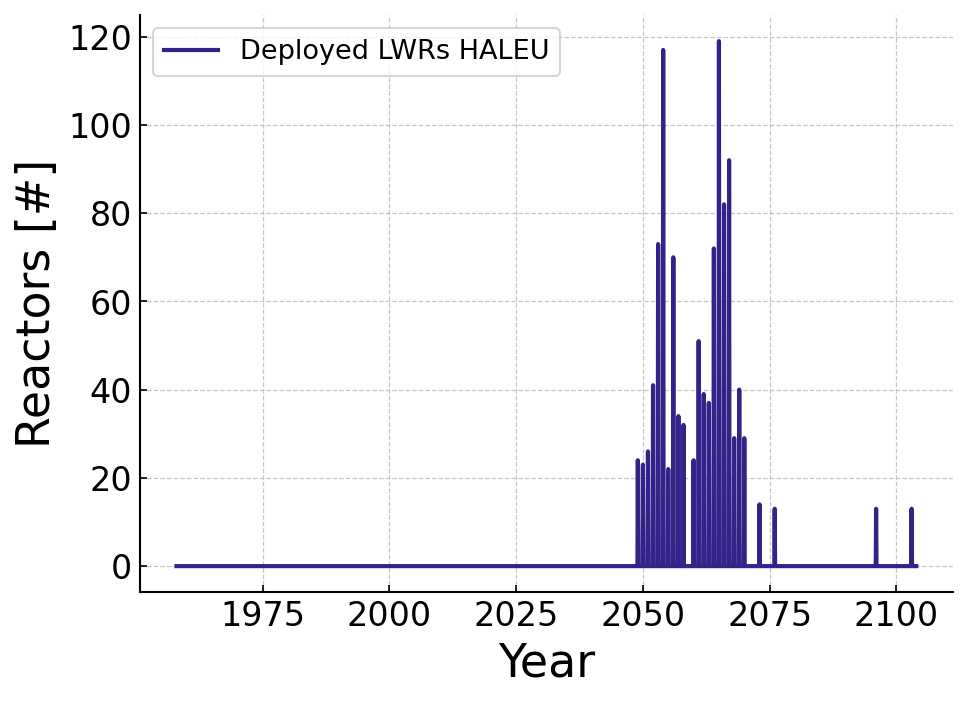

In [174]:
# plt.plot(current_reactors['Year'], current_reactors['Xe100l'], label='Deployed LWRs LEU+')
plt.plot(current_reactors['Year'], current_reactors['Xe100h'], label='Deployed LWRs HALEU')
#plt.title('Number of Reactors Deployed')
plt.xlabel('Year')
plt.ylabel('Reactors [#]')
# plt.yscale('log')
plt.legend()

## Energy Output

In [161]:
current_energy = tm.get_annual_electricity(current_outfile)

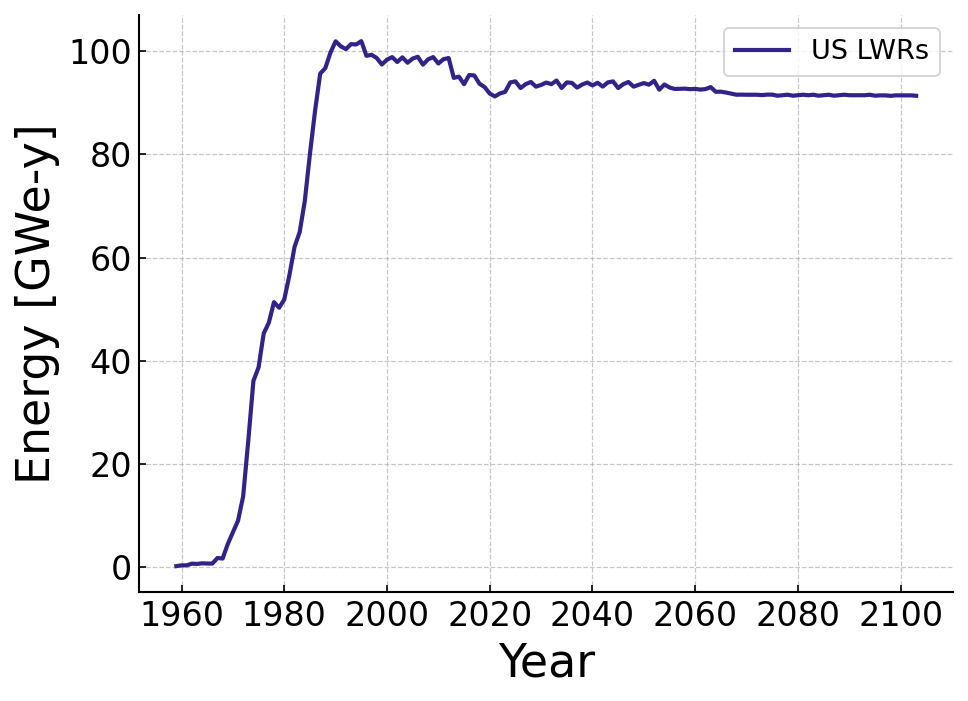

In [162]:
# Plot the yearly energy

plt.plot(current_energy['Year'], current_energy['Energy'], label='US LWRs', color=mycolors[0])

#plt.title('Energy Generation Each Year')
plt.xlabel('Year')
plt.ylabel('Energy [GWe-y]')
plt.legend()

## Material Transactions

In [175]:
current_transactions = tm.add_receiver_prototype(current_outfile)

In [176]:
current_uox = dta.commodity_mass_traded(current_transactions, 'fresh_uox')
# current_mmr_leup = dta.commodity_mass_traded(current_transactions, 'fresh_mmr_leup')
# current_mmr_haleu = dta.commodity_mass_traded(current_transactions, 'fresh_mmr_haleu')

current_xe_leup = dta.commodity_mass_traded(current_transactions, 'fresh_xe100_leup')
current_xe_haleu = dta.commodity_mass_traded(current_transactions, 'fresh_xe100_haleu')

Text(0.5, 0, 'Year')

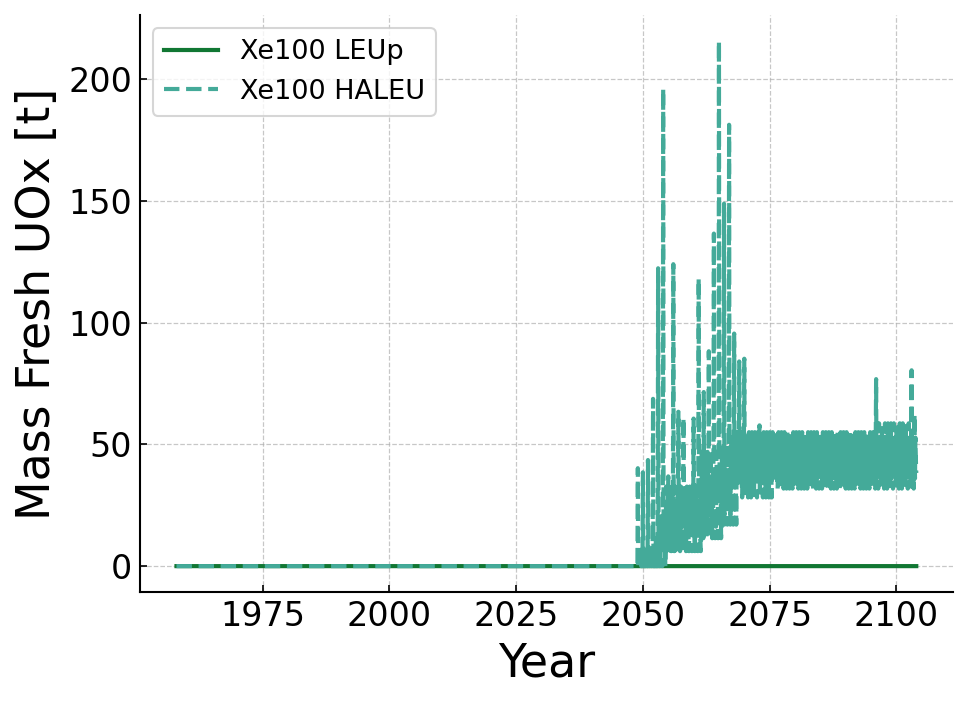

In [177]:
# Comparing fresh_uox transactions to all reactors

# plt.plot(current_uox['Year'], current_uox['Quantity']/1000,
#          label='US LWRs', color=mycolors[0])
# plt.plot(current_uox['Year'], current_mmr_leup['Quantity']/1000,
#          label='MMR LEUp', color=mycolors[1])
# plt.plot(current_uox['Year'], current_mmr_haleu['Quantity']/1000,
#          label='MMR HALEU', color=mycolors[2], linestyle='--')

plt.plot(current_xe_leup['Year'], current_xe_leup['Quantity']/1000,
         label='Xe100 LEUp', color=mycolors[1])
plt.plot(current_xe_haleu['Year'], current_xe_haleu['Quantity']/1000,
         label='Xe100 HALEU', color=mycolors[2], linestyle='--')

# plt.xlim(2000,2002)
# plt.ylim(123,125)
plt.legend() #(loc=2)
plt.ylabel('Mass Fresh UOx [t]')
plt.xlabel('Year')
#plt.title('Mass of UOx supplied')

In [166]:
current_xe_leup['Quantity']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1747    0.0
1748    0.0
1749    0.0
1750    0.0
1751    0.0
Name: Quantity, Length: 1752, dtype: float64

Text(0.5, 0, 'Year')

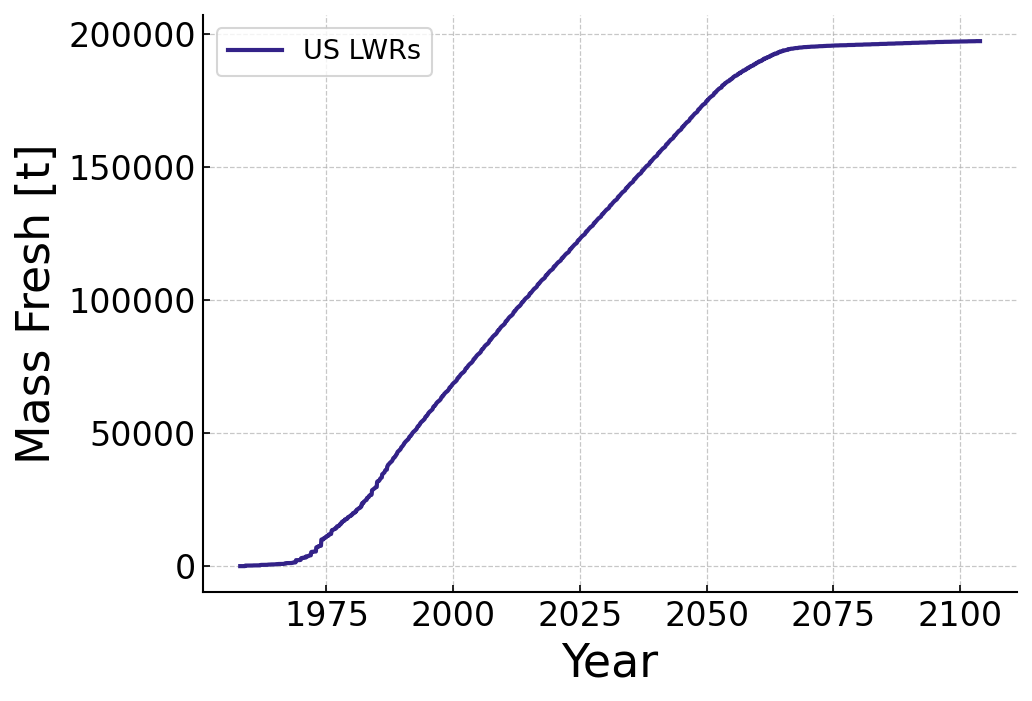

In [167]:
plt.plot(current_uox['Year'], current_uox['Quantity'].cumsum()/1000,
         label='US LWRs', color=mycolors[0])
plt.legend()
plt.ylabel('Mass Fresh [t]')
plt.xlabel('Year')
#plt.title('Cumulative Mass of UOx supplied')

## SWU Calcs
SWU = $(P*V(x_p) + T*V(x_t) - F*V(x_f))*t$

V($x_i$) = $(2*x_i-1)*\ln(x_i/(1-x_i))$

In [63]:
#Defining assays for LEU product, tails, and feed material
leu_p = 0.045
x_f = 0.00711
x_t = 0.002

In [64]:
current_tails = dta.calculate_tails(current_uox['Quantity'], leu_p, x_t, x_f)
current_feed = dta.calculate_feed(current_uox['Quantity'], current_tails)
current_swu = dta.calculate_SWU(current_uox['Quantity'], leu_p,
                               current_tails, x_t,
                               current_feed, x_f)
current_swu = current_swu.to_frame().reset_index()
current_swu = current_swu.rename(columns={'Quantity':'SWU', 'index':'Time'})
current_swu = dta.add_year(current_swu)

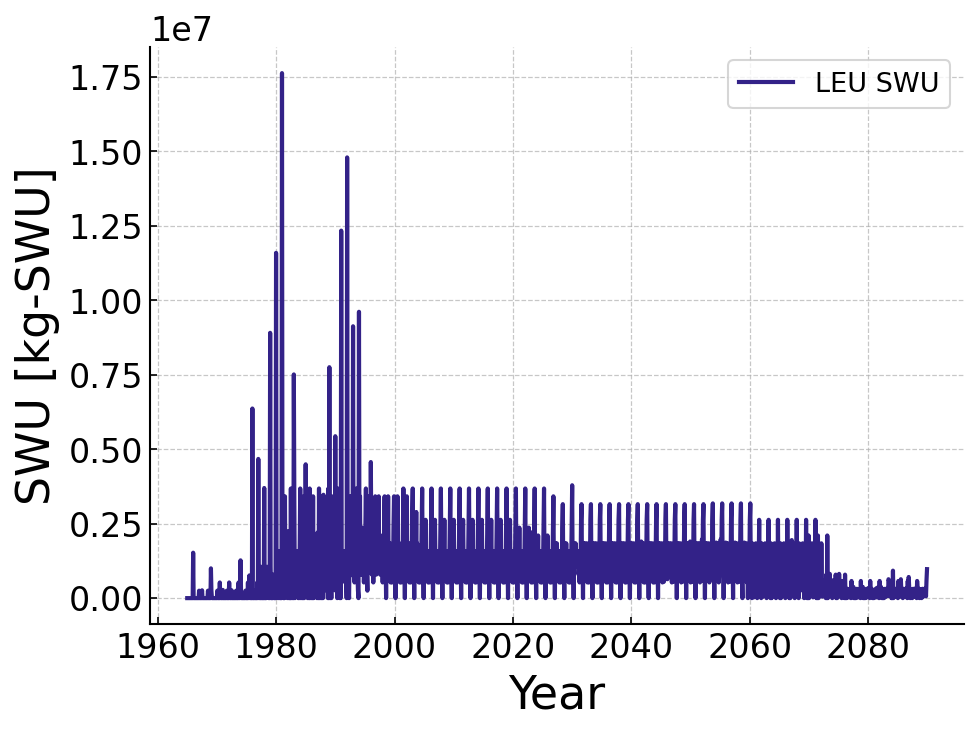

In [65]:
plt.plot(current_swu['Year'], current_swu['SWU'], label='LEU SWU', color=mycolors[0])

plt.xlabel('Year')
plt.ylabel('SWU [kg-SWU]')
#title = plt.title('SWU Capacity to enrich uranium for LWRs', pad=20)
plt.legend()

## Waste Calcs

In [66]:
used_uox = dta.commodity_mass_traded(current_transactions, 'used_uox')

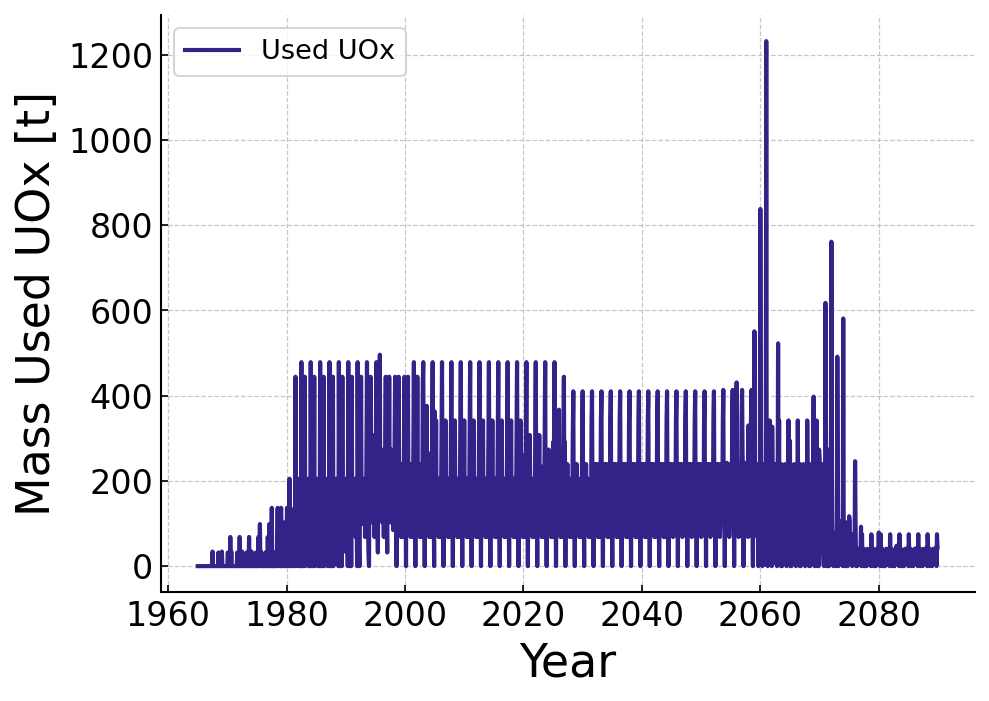

In [67]:
plt.plot(used_uox['Year'], used_uox['Quantity']/1000, label='Used UOx')

plt.ylabel('Mass Used UOx [t]')
plt.xlabel('Year')
plt.legend()

# Isotopics

In [47]:
all_isotopes = ['551370000', '922350000', '922380000', '942390000']
commodities = ['used_uox']
receivers = ['Sink_HLW']

isotope_db = nuclides.isotope_database(evaler=evaler,receivers=receivers, commodities=commodities, isotopes=all_isotopes)


/home/nsryan/Desktop/arfc/transition-scenarios/scenarios/triso/analysis/nuclides.py:151: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.47025337104066417' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  isotope_df.loc[str(time_step), str(nucid)] = mass
/home/nsryan/Desktop/arfc/transition-scenarios/scenarios/triso/analysis/nuclides.py:151: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.3986367202380094' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  isotope_df.loc[str(time_step), str(nucid)] = mass
/home/nsryan/Desktop/arfc/transition-scenarios/scenarios/triso/analysis/nuclides.py:151: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '414.4127785558131' has dtyp

In [ ]:
isotope_db.to_csv('lwr_only_isotope_db.csv')

In [5]:
# read in the isotope database from the csv to a pandas dataframe
isotope_db = pd.read_csv('lwr_only_isotope_db.csv')

In [6]:
isotope_db['TimeStep'] = isotope_db['Unnamed: 0']

In [7]:
isotope_db = isotope_db.drop(columns=['Unnamed: 0'])
isotope_db = isotope_db.sort_values(by='TimeStep')

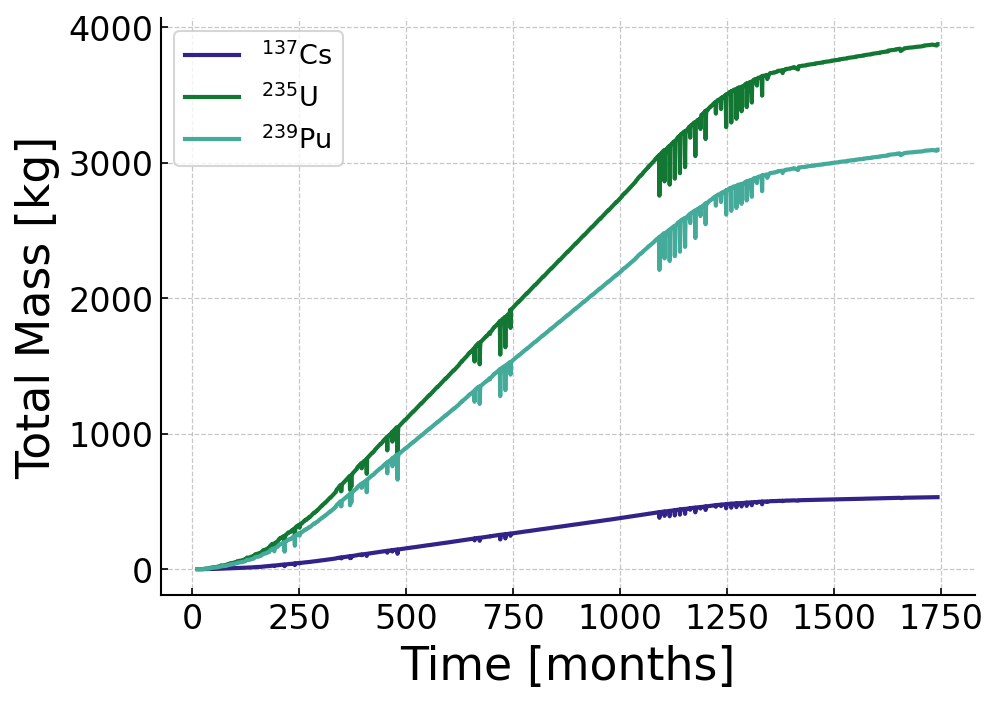

In [8]:
isotope_db[['TimeStep','551370000_total','922350000_total','942390000_total']].plot(x='TimeStep', style=['-','-','-'])
plt.xlabel('Time [months]')
plt.ylabel('Total Mass [kg]')

legend = plt.legend()
legend.get_texts()[0].set_text(f'$^{{137}}$Cs')
legend.get_texts()[1].set_text(f'$^{{235}}$U')
legend.get_texts()[2].set_text(f'$^{{239}}$Pu')